In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import math
from sklearn import ensemble
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, precision_recall_curve
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE


In [18]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [66]:
train_df = pd.read_csv('final_features.csv')
target = pd.read_csv('train.csv')
test_df = pd.read_csv('Test_Clean_data.csv', index_col=0)

In [67]:
train_df.head()

,Provider,ClaimID,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diag,V5861_diag,2724_diag,4011_diag,2449_diag,4019_diag,25000_diag,42731_diag,4019_proc,9904_proc,2724_proc,8154_proc,66_proc,3893_proc,3995_proc,4516_proc,3722_proc,8151_proc,8872_proc,5_state,10_state,33_state,45_state,14_state,39_state,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_days
0,PRV51001,25,11,5.0,2,3,80.0,8.0,12,1,0,2,0,1,3,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,78,62.0,39,48,693.0,29.0,29,7,6,16,3,12,25,15,11,3,0,1,2,1,2,2,1,2,0,0,0,23,0,0,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,28,0.0,0,0,385.0,23.0,76,2,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,252,0.0,0,0,3016.0,259.0,565,56,47,73,62,30,140,54,23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,17,3.0,1,1,215.0,11.0,31,2,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333


In [21]:
train_df.columns

Index(['Provider', 'ClaimID', 'ClmAdmitDiagnosisCode', 'Inpatient',
       'ClmProcedureCode', 'ClmProcedureCode_count', 'ClmDiagnosisCode_count',
       'RenalDiseaseIndicator', 'duplicate', 'V5869_diag', 'V5861_diag',
       '2724_diag', '4011_diag', '2449_diag', '4019_diag', '25000_diag',
       '42731_diag', '4019_proc', '9904_proc', '2724_proc', '8154_proc',
       '66_proc', '3893_proc', '3995_proc', '4516_proc', '3722_proc',
       '8151_proc', '8872_proc', '5_state', '10_state', '33_state', '45_state',
       '14_state', '39_state', 'Patient_Connections', 'AttPhys_Connections',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'treatment_days',
       'Gender', 'IPAnnualReimbursementAmt', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'num_chronic',
       'Age', 'claim_days'],
      dtype='object')

In [68]:
print(train_df.shape)
print(target.shape)
print(test_df.shape)

(5410, 49)
(5410, 2)
(1353, 44)


In [69]:
target['PotentialFraud'].replace({'No':0, 'Yes':1}, inplace=True)
target.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


Text(0, 0.5, 'Frequency')

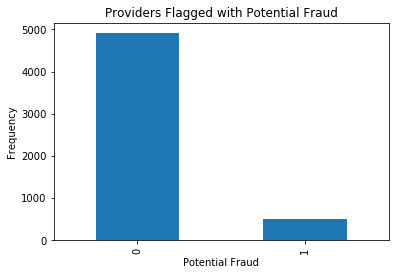

In [70]:
target['PotentialFraud'].value_counts().plot(kind = 'bar')
plt.title("Providers Flagged with Potential Fraud")
plt.xlabel("Potential Fraud")
plt.ylabel("Frequency")

In [71]:
final_df = pd.merge(train_df, target, on='Provider')

In [72]:
final_df.drop('Provider', axis=1, inplace=True)

In [73]:
final_df.head()

,ClaimID,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diag,V5861_diag,2724_diag,4011_diag,2449_diag,4019_diag,25000_diag,42731_diag,4019_proc,9904_proc,2724_proc,8154_proc,66_proc,3893_proc,3995_proc,4516_proc,3722_proc,8151_proc,8872_proc,5_state,10_state,33_state,45_state,14_state,39_state,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_days,PotentialFraud
0,25,11,5.0,2,3,80.0,8.0,12,1,0,2,0,1,3,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000,0
1,132,78,62.0,39,48,693.0,29.0,29,7,6,16,3,12,25,15,11,3,0,1,2,1,2,2,1,2,0,0,0,23,0,0,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242,1
2,149,28,0.0,0,0,385.0,23.0,76,2,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530,0
3,1165,252,0.0,0,0,3016.0,259.0,565,56,47,73,62,30,140,54,23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412,1
4,72,17,3.0,1,1,215.0,11.0,31,2,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333,0


In [74]:
final_df.loc[final_df['PotentialFraud'] == 1].ClaimID.median()

155.5

In [75]:
final_df.loc[final_df['PotentialFraud'] == 1].ClaimID.mean()

420.54545454545456

In [76]:
final_df.loc[final_df['PotentialFraud'] == 1].ClaimID.min()

1

In [77]:
final_df.loc[final_df['PotentialFraud'] == 1].ClaimID.max()

8240

In [36]:
# 27 cases x $3800 > $100k
# median number of cases per provider is 155
len(final_df.loc[final_df['PotentialFraud'] == 1].ClaimID > 27) #506

506

### Preparing data for train_test_split

In [37]:
target = final_df['PotentialFraud']
final_df.drop('PotentialFraud', axis=1, inplace=True)

In [38]:
random_state = 0
cv = 10
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.3, random_state=random_state)


In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3787, 48), (3787,), (1623, 48), (1623,))

## Random Forest without tuning hyperparameters

In [243]:
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(random_state=random_state)
randomForest.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [244]:
y_pred = randomForest.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1445   29]
 [  80   69]] 

Accuracy: 0.9328404189772027
Area Under the Curve: 0.7217064464134483
F1: 0.5587044534412955
F0.5: 0.6377079482439926
F2: 0.49711815561959655
Precision: 0.7040816326530612
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1474
           1       0.70      0.46      0.56       149

    accuracy                           0.93      1623
   macro avg       0.83      0.72      0.76      1623
weighted avg       0.93      0.93      0.93      1623
 



## Function for Creating Confusion Matrix

In [27]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm/np.sum(cm), annot=labels, ax = ax, fmt='', cmap = "Blues"); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix with Random Forest')
    ax.xaxis.set_ticklabels(['Not Fraud', 'Potential Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Potential Fraud'])
    return


### Random Forest with Grid Search Cross Validation Optimizing Precision

In [33]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [138]:
randomForest_prec = ensemble.RandomForestClassifier(random_state=random_state)
gridsearch_forest_prec = ms.GridSearchCV(randomForest_prec, grid_para_forest, scoring='precision', cv=cv, n_jobs=-1)
%time gridsearch_forest_prec.fit(X_train, y_train)

CPU times: user 38.1 s, sys: 3.15 s, total: 41.2 s
Wall time: 32min 22s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='precision')

In [139]:
# get the best parameters
gridsearch_forest_prec.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 30}

In [141]:
y_pred = gridsearch_forest_prec.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1471    3]
 [ 126   23]] 

Accuracy: 0.9205175600739371
Area Under the Curve: 0.5761635689763507
F1: 0.2628571428571428
F0.5: 0.4545454545454546
F2: 0.18488745980707397
Precision: 0.8846153846153846
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1474
           1       0.88      0.15      0.26       149

    accuracy                           0.92      1623
   macro avg       0.90      0.58      0.61      1623
weighted avg       0.92      0.92      0.89      1623
 



### Random Forest with Class Weight and Best Parameters from 'Precision' Scoring GridSearchCV

#### Random Forest with "balanced" Class Weight


In [142]:
# Class Weight = 'balanced'
randomForest_prec2 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest_prec2.set_params(criterion = 'gini', max_depth = 1, n_estimators = 30, class_weight = 'balanced')
randomForest_prec2.fit(X_train, y_train)
randomForest_prec2.score(X_train, y_train)


0.8273039345128069

In [143]:
y_pred = randomForest_prec2.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1228  246]
 [  24  125]] 

Accuracy: 0.833641404805915
Area Under the Curve: 0.8360166829063954
F1: 0.4807692307692308
F0.5: 0.3827311696264543
F2: 0.6463288521199586
Precision: 0.33692722371967654
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      1474
           1       0.34      0.84      0.48       149

    accuracy                           0.83      1623
   macro avg       0.66      0.84      0.69      1623
weighted avg       0.92      0.83      0.86      1623
 



#### Random Forest with "balanced_subsample" Class Weight

In [144]:
# Class Weight = balanced_subsample
# This is the same as “balanced” except that weights are computed based on 
# the bootstrap sample for every tree grown

randomForest_prec3 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest_prec3.set_params(criterion = 'gini', max_depth = 1, n_estimators = 30, class_weight = 'balanced_subsample')
randomForest_prec3.fit(X_train, y_train)
randomForest_prec3.score(X_train, y_train)


0.832057037232638

In [145]:
y_pred = randomForest_prec3.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1235  239]
 [  24  125]] 

Accuracy: 0.8379544054220579
Area Under the Curve: 0.8383911740868567
F1: 0.48732943469785583
F0.5: 0.38940809968847356
F2: 0.6510416666666667
Precision: 0.3434065934065934
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      1474
           1       0.34      0.84      0.49       149

    accuracy                           0.84      1623
   macro avg       0.66      0.84      0.70      1623
weighted avg       0.92      0.84      0.87      1623
 



#### Random Forest with Manual Class Weight

In [146]:
target.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [147]:
print(506/4904)
# Class 1 is about 10 times more prevalent than class 0

0.10318107667210441


In [148]:
randomForest_prec4 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest_prec4.set_params(criterion = 'gini', max_depth = 1, n_estimators = 30, class_weight = {0:1, 1:10})
randomForest_prec4.fit(X_train, y_train)
randomForest_prec4.score(X_train, y_train)


0.8111961975178241

In [149]:
y_pred = randomForest_prec4.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1211  263]
 [  21  128]] 

Accuracy: 0.8250154035736291
Area Under the Curve: 0.840317175562092
F1: 0.4740740740740741
F0.5: 0.3736135434909516
F2: 0.6484295845997975
Precision: 0.3273657289002558
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.82      0.90      1474
           1       0.33      0.86      0.47       149

    accuracy                           0.83      1623
   macro avg       0.66      0.84      0.68      1623
weighted avg       0.92      0.83      0.86      1623
 



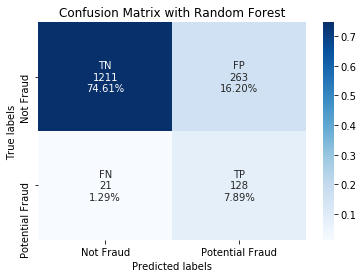

In [150]:
plot_cm(y_test, y_pred)

### Grid Search CV with "precision" scoring and Manual Class Weight

In [115]:
randomForest_prec5 = ensemble.RandomForestClassifier(class_weight = {0:1, 1:10}, random_state=random_state)
gridsearch_forest_prec2 = ms.GridSearchCV(randomForest_prec5, grid_para_forest, scoring='precision', cv=cv, n_jobs=-1)
%time gridsearch_forest_prec2.fit(X_train, y_train)


CPU times: user 40.4 s, sys: 3.06 s, total: 43.5 s
Wall time: 32min 13s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 10},
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='precision')

In [116]:
gridsearch_forest_prec2.best_params_

{'criterion': 'entropy', 'max_depth': 29, 'n_estimators': 30}

In [117]:
y_pred = gridsearch_forest_prec2.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1450   24]
 [  83   66]] 

Accuracy: 0.9340727048675292
Area Under the Curve: 0.7133353974483895
F1: 0.5523012552301254
F0.5: 0.6483300589390962
F2: 0.4810495626822158
Precision: 0.7333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1474
           1       0.73      0.44      0.55       149

    accuracy                           0.93      1623
   macro avg       0.84      0.71      0.76      1623
weighted avg       0.93      0.93      0.93      1623
 



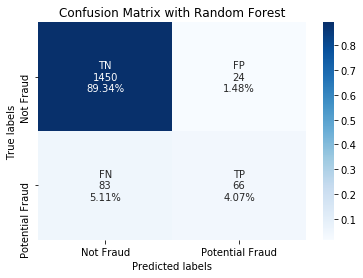

In [118]:
plot_cm(y_test, y_pred)

### Grid Search CV with "precision" scoring and 'balanced' Class Weight


In [109]:
randomForest_prec6 = ensemble.RandomForestClassifier(class_weight = 'balanced', random_state=random_state)
gridsearch_forest_prec3 = ms.GridSearchCV(randomForest_prec6, grid_para_forest, scoring='precision', cv=cv, n_jobs=-1)
%time gridsearch_forest_prec3.fit(X_train, y_train)


CPU times: user 40 s, sys: 3.18 s, total: 43.2 s
Wall time: 30min 37s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='precision')

In [110]:
# get the best parameters
gridsearch_forest_prec3.best_params_

{'criterion': 'entropy', 'max_depth': 29, 'n_estimators': 100}

In [111]:
y_pred = gridsearch_forest_prec3.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1455   19]
 [  85   64]] 

Accuracy: 0.9359211337030191
Area Under the Curve: 0.7083200531813173
F1: 0.5517241379310345
F0.5: 0.6652806652806653
F2: 0.47128129602356406
Precision: 0.7710843373493976
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1474
           1       0.77      0.43      0.55       149

    accuracy                           0.94      1623
   macro avg       0.86      0.71      0.76      1623
weighted avg       0.93      0.94      0.93      1623
 



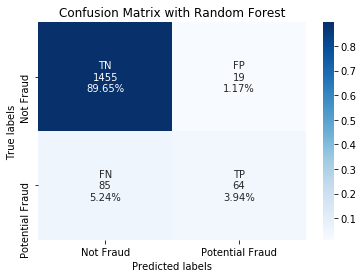

In [112]:
plot_cm(y_test, y_pred)

### Grid Search CV with "precision" scoring and 'balanced_subsample' Class Weight


In [105]:
randomForest_prec7 = ensemble.RandomForestClassifier(class_weight = 'balanced_subsample', random_state=random_state)
gridsearch_forest_prec4 = ms.GridSearchCV(randomForest_prec7, grid_para_forest, scoring='precision', cv=cv, n_jobs=-1)
%time gridsearch_forest_prec4.fit(X_train, y_train)


CPU times: user 38.7 s, sys: 3.01 s, total: 41.7 s
Wall time: 36min 9s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='precision')

In [106]:
# get the best parameters
gridsearch_forest_prec4.best_params_

{'criterion': 'entropy', 'max_depth': 24, 'n_estimators': 30}

In [107]:
y_pred = gridsearch_forest_prec4.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1455   19]
 [  88   61]] 

Accuracy: 0.9340727048675292
Area Under the Curve: 0.6982529390873576
F1: 0.5327510917030568
F0.5: 0.650319829424307
F2: 0.45118343195266275
Precision: 0.7625
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1474
           1       0.76      0.41      0.53       149

    accuracy                           0.93      1623
   macro avg       0.85      0.70      0.75      1623
weighted avg       0.93      0.93      0.92      1623
 



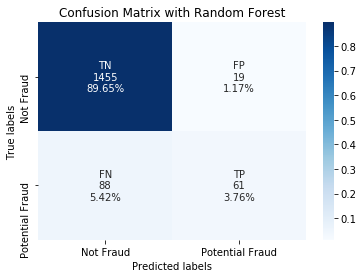

In [108]:
plot_cm(y_test, y_pred)

## Grid Search CV with "f1" scoring and 'balanced' Class Weight


In [132]:
randomForest_f1 = ensemble.RandomForestClassifier(class_weight='balanced', random_state=random_state)
gridsearch_forest_f1 = ms.GridSearchCV(randomForest_f1, grid_para_forest, scoring='f1', cv=cv, n_jobs=-1)
%time gridsearch_forest_f1.fit(X_train, y_train)


CPU times: user 39.4 s, sys: 3.22 s, total: 42.6 s
Wall time: 31min 17s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='f1')

In [133]:
# get the best parameters
gridsearch_forest_f1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 40}

In [134]:
y_pred = gridsearch_forest_f1.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1369  105]
 [  47  102]] 

Accuracy: 0.9063462723351817
Area Under the Curve: 0.806664511487711
F1: 0.5730337078651685
F0.5: 0.5220061412487206
F2: 0.6351183063511832
Precision: 0.4927536231884058
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1474
           1       0.49      0.68      0.57       149

    accuracy                           0.91      1623
   macro avg       0.73      0.81      0.76      1623
weighted avg       0.92      0.91      0.91      1623
 



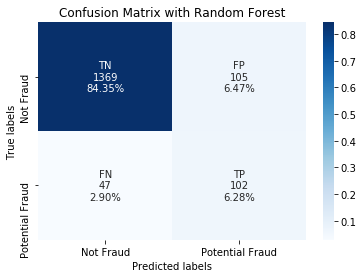

In [135]:
plot_cm(y_test, y_pred)

## BalancedRandomForestClassifier
### from imblearn.ensemble import BalancedRandomForestClassifier

In [128]:
randomForest_balanced = BalancedRandomForestClassifier(random_state=random_state)
gridsearch_forest_balanced = ms.GridSearchCV(randomForest_balanced, grid_para_forest, scoring='precision', cv=cv, n_jobs=-1)
%time gridsearch_forest_balanced.fit(X_train, y_train)


CPU times: user 40 s, sys: 3.15 s, total: 43.1 s
Wall time: 27min 20s


GridSearchCV(cv=10, estimator=BalancedRandomForestClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='precision')

In [129]:
y_pred = gridsearch_forest_balanced.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1272  202]
 [  28  121]] 

Accuracy: 0.8582871226124461
Area Under the Curve: 0.8375192372487776
F1: 0.5127118644067796
F0.5: 0.4198473282442748
F2: 0.6583242655059847
Precision: 0.3746130030959752
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      1474
           1       0.37      0.81      0.51       149

    accuracy                           0.86      1623
   macro avg       0.68      0.84      0.71      1623
weighted avg       0.92      0.86      0.88      1623
 



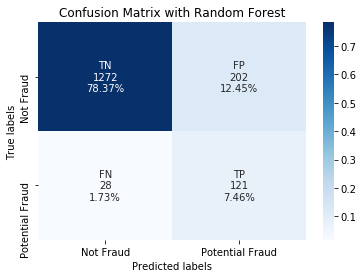

In [130]:
plot_cm(y_test, y_pred)

## Random Forest and SMOTE

In [119]:
# oversampler = SMOTE(random_state=random_state)
os_Xtrain, os_ytrain = SMOTE(random_state=random_state).fit_resample(X_train, y_train)
len(os_ytrain[os_ytrain==1])

3430

In [120]:
len(y_train[y_train==1])

357

In [124]:
randomforest_SMOTE = ensemble.RandomForestClassifier()
randomforest_SMOTE.set_params(criterion = 'entropy', max_depth = 28, n_estimators = 20, random_state=random_state)
randomforest_SMOTE.fit(os_Xtrain, os_ytrain)

RandomForestClassifier(criterion='entropy', max_depth=28, n_estimators=20,
                       random_state=0)

In [125]:
y_pred = randomforest_SMOTE.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1381   93]
 [  49  100]] 

Accuracy: 0.9125077017868145
Area Under the Curve: 0.8040236584011
F1: 0.5847953216374269
F0.5: 0.5428881650380021
F2: 0.6337135614702155
Precision: 0.5181347150259067
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1474
           1       0.52      0.67      0.58       149

    accuracy                           0.91      1623
   macro avg       0.74      0.80      0.77      1623
weighted avg       0.92      0.91      0.92      1623
 



## Grid Search CV with Random Forest and SMOTE

In [123]:
randomforest_SMOTE2 = ensemble.RandomForestClassifier(random_state=random_state)
gridsearch_forest_SMOTE = ms.GridSearchCV(randomforest_SMOTE2, grid_para_forest, scoring='precision', cv=cv, n_jobs=-1)
gridsearch_forest_SMOTE.fit(os_Xtrain, os_ytrain)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='precision')

In [126]:
y_pred = gridsearch_forest_SMOTE.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1: {}'.format(f1_score(y_test, y_pred)))
print('F0.5: {}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F2: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[1393   81]
 [  56   93]] 

Accuracy: 0.9155884165126309
Area Under the Curve: 0.7846042818245563
F1: 0.5758513931888545
F0.5: 0.5502958579881656
F2: 0.6038961038961038
Precision: 0.5344827586206896
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1474
           1       0.53      0.62      0.58       149

    accuracy                           0.92      1623
   macro avg       0.75      0.78      0.76      1623
weighted avg       0.92      0.92      0.92      1623
 



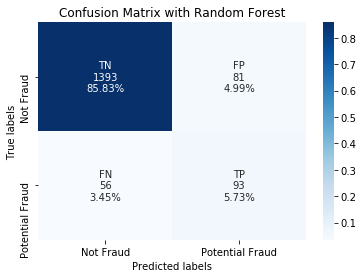

In [127]:
plot_cm(y_test, y_pred)

### Feature Importance from Model with Best Metrics
###### gridsearch_forest_prec4

In [151]:
# Showing 20 most important features
feature_importance = list(zip(final_df.columns, gridsearch_forest_prec3.best_estimator_.feature_importances_))
dtype = [('feature', 'S30'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort]

[b'Inpatient',
 b'ClmProcedureCode_count',
 b'ClmProcedureCode',
 b'42731_diag',
 b'ClmAdmitDiagnosisCode',
 b'treatment_days',
 b'2449_diag',
 b'DeductibleAmtPaid',
 b'ClmDiagnosisCode_count',
 b'25000_diag',
 b'2724_diag',
 b'4019_diag',
 b'InscClaimAmtReimbursed',
 b'RenalDiseaseIndicator',
 b'IPAnnualReimbursementAmt',
 b'duplicate',
 b'ClaimID',
 b'Patient_Connections',
 b'claim_days',
 b'Age',
 b'IPAnnualDeductibleAmt',
 b'4019_proc',
 b'num_chronic',
 b'OPAnnualReimbursementAmt',
 b'Gender',
 b'OPAnnualDeductibleAmt',
 b'AttPhys_Connections',
 b'4011_diag',
 b'V5861_diag',
 b'NoOfMonths_PartBCov',
 b'V5869_diag',
 b'NoOfMonths_PartACov',
 b'9904_proc',
 b'5_state',
 b'2724_proc',
 b'66_proc',
 b'10_state',
 b'14_state',
 b'33_state',
 b'39_state',
 b'45_state',
 b'8154_proc',
 b'8151_proc',
 b'3893_proc',
 b'4516_proc',
 b'3995_proc',
 b'3722_proc',
 b'8872_proc']

In [ ]:
# 2449_diagcode - Hypothyroidism
# 42731_diagcode - Atrial Fibrillation
# 4019_diagcode - Essential (primary) Hypertension
# 25000_diagcode - Diabetes Mellitus without complications
# 2724_diagcode - Hyperlipidemia
# 4011_diagcode - Unspecified Essential Hypertension

Text(0.5, 1.0, 'feature importance')

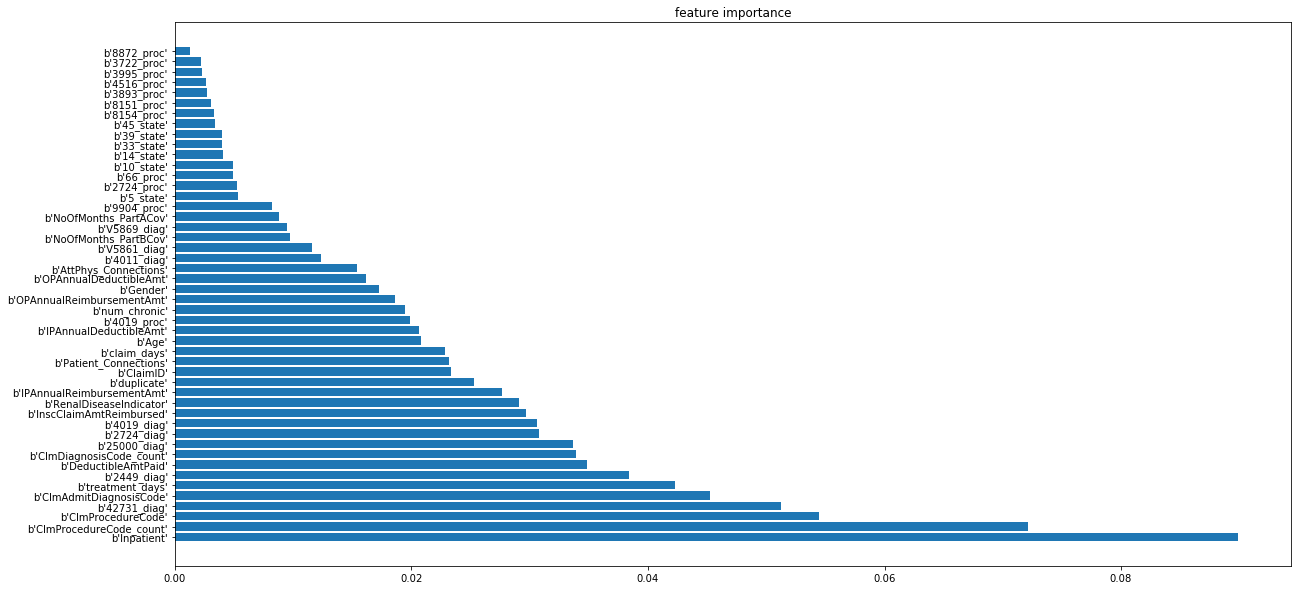

In [152]:
featureNames, featureScores = zip(*list(feature_sort))
plt.figure(figsize=(20,10))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')

### Summary
Best precision score achieved with the following model:
<br>Grid Search CV with "precision" scoring and "balanced' Class Weight

<br>Confusion Matrix: 
<br>[[1455   19]
<br>[  85   64]] 

<br>Accuracy: 0.9359211337030191
<br>Area Under the Curve: 0.7083200531813173
<br>F1: 0.5517241379310345
<br>F0.5: 0.6652806652806653
<br>F2: 0.47128129602356406
<br>Precision: 0.7710843373493976


## Comparing Cost Matrix


In [56]:
def plot_costMatrix(cm):
    total_cost = 0
    costs = [0, 100000, 589000, -589000]
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_cost = []
    for i in range(len(cm.flatten())):
        group_cost.append('${}'.format(cm.flatten()[i]*costs[i]))
        total_cost = total_cost + cm.flatten()[i]*costs[i]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_cost)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm/np.sum(cm), annot=labels, ax = ax, fmt='', cmap = 'Blues', cbar=False); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Cost Matrix')
    ax.xaxis.set_ticklabels(['Not Fraud', 'Potential Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Potential Fraud'])
    return total_cost


<br> Commercial insurance 
<br> Cost of each False Positive (FP) = cost of discovery and litigation: 100k
<br> Cost of each False Negative (FN) = 3800
<br> Savings from detecting fraudulent provider, True Positive (TP) = -3800

In [57]:
# Random Forest with Best Scores
randomForest_best = ensemble.RandomForestClassifier(random_state=random_state)
randomForest_best.set_params(criterion = 'entropy', max_depth = 29, n_estimators = 100, class_weight = 'balanced')
randomForest_best.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=29, random_state=0)

14269000


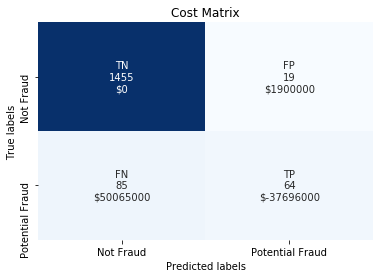

In [58]:
y_pred = randomForest_best.predict(X_test)
rf_best_cm = confusion_matrix(y_test, y_pred)
rf_best_cost = plot_costMatrix(rf_best_cm)
print(rf_best_cost)

In [59]:
# Random Forest without tuning parameters
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(random_state=random_state)
randomForest.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [ ]:
# Assuming FP is discovery fee of $100k
#Cost of TN = $0, cost of FP = $100k, cost of FN = $3800, cost of TP -$3800
#Cost M1 = $2,900,000 + $304,000 - $262,000 = $2,942,000
#Cost M2 = $1,900,000 + $323000 - $243200 = $1,979,800
#Total Savings = Cost M1 - Cost M2 = $2,942,000 - $1,979,800 = $962,200

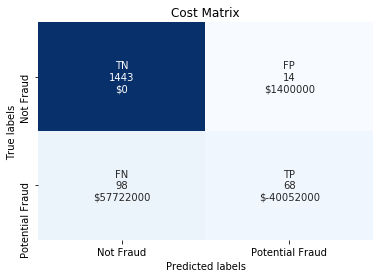

In [60]:
# Logistic Regression Cost Matrix
lr_cm = np.asarray([1443, 14, 98, 68]).reshape(2,2)
lr_cost = plot_costMatrix(lr_cm)


In [61]:
lr_cost

19070000

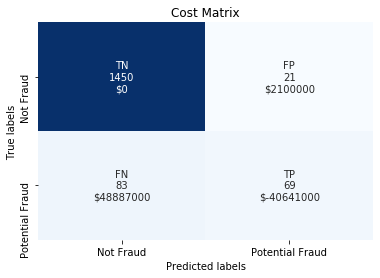

In [62]:
# Ensemble Cost Matrix
ens_cm = np.asarray([1450, 21, 83, 69]).reshape(2,2)
ens_cost = plot_costMatrix(ens_cm)


In [63]:
ens_cost

10346000

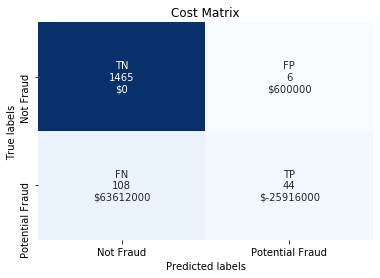

In [64]:
# GMB Cost Matrix
gmb_cm = np.asarray([1465, 6, 108, 44]).reshape(2,2)
gmb_cost = plot_costMatrix(gmb_cm)

In [65]:
gmb_cost

38296000